# Step 1: Define the Problem
Objective: Identify what you want to achieve with the model. In this case, we aim to predict customer satisfaction or another key metric using available features like age, gender, reviews, and shopping habits.


# Step 2: Split the Data into Features and Labels
Splitting the Data into Training and Testing Sets
Here, we split the dataset into 80% training data and 20% testing data to evaluate the model’s performance on unseen data.

Separate the dataset into features (independent variables) and target (dependent variable to predict
).

In [2]:
import pandas as pd

# Use your local file path
file_path = r'C:\Users\Ogbemudia\Downloads\processed_amazon_customer_data_model_ready.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Clean the data by removing timestamp columns and low variance columns
timestamp_columns = [col for col in data.columns if 'Timestamp' in col]
data_cleaned = data.drop(columns=timestamp_columns)

# Dropping low variance columns
low_variance_cols = [col for col in data_cleaned.columns if data_cleaned[col].nunique() <= 1]
data_cleaned = data_cleaned.drop(columns=low_variance_cols)

# Now proceed to split the data into features (X) and target (y)

# Example: Assuming 'Shopping_Satisfaction' is the target variable
X = data_cleaned.drop(columns=['Shopping_Satisfaction'])  # Features
y = data_cleaned['Shopping_Satisfaction']  # Target


In [3]:
pip install pandas scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Step 3: Split the Data into Training and Testing Sets
We split the data into training and testing sets to evaluate the model's performance on unseen data.


In [4]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 4: Choose a Machine Learning Model


In [5]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Step 5: Evaluate the Model
Now, we test the model on the test data to see how well it performs.


In [6]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.5041322314049587
Classification Report:
              precision    recall  f1-score   support

           1       0.43      0.32      0.36        19
           2       0.48      0.65      0.55        37
           3       0.53      0.64      0.58        45
           4       1.00      0.06      0.11        17
           5       1.00      0.33      0.50         3

    accuracy                           0.50       121
   macro avg       0.69      0.40      0.42       121
weighted avg       0.58      0.50      0.47       121



# Step 6: Hyperparameter Tuning (Optional)


In [7]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Set up the Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model with different hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Hyperparameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_score}')


Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.5073453608247422


# Step 7: Save the Final Model


In [8]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'final_model.pkl')


['final_model.pkl']

# To build and train the business analytics model using your data, I'll proceed with the following steps:


# Split the Data into training and testing sets.
# Train the Model using a Random Forest Classifier (as an example).
# Evaluate the Model on the test set.


In [10]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# 1. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# 3. Train the model on the training data
model.fit(X_train, y_train)

# 4. Make predictions on the test data
y_pred = model.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

# 6. Save the model
joblib.dump(model, 'business_analytics_model.pkl')


Accuracy: 0.5041322314049587
Classification Report:
              precision    recall  f1-score   support

           1       0.43      0.32      0.36        19
           2       0.48      0.65      0.55        37
           3       0.53      0.64      0.58        45
           4       1.00      0.06      0.11        17
           5       1.00      0.33      0.50         3

    accuracy                           0.50       121
   macro avg       0.69      0.40      0.42       121
weighted avg       0.58      0.50      0.47       121



['business_analytics_model.pkl']

# What this does:
Data Splitting: It divides the data into 80% training and 20% testing sets.
Model Training: The Random Forest Classifier is trained using the training data.
Model Evaluation: After training, the model predicts the test data and outputs accuracy and other key performance metrics.
Saving the Model: The trained model is saved as business_analytics_model.pkl for future use.


# To evaluate the performance of the model, we will use key classification metrics such as:

Accuracy: The percentage of correctly predicted instances.
Precision: The ability of the classifier not to label a negative sample as positive (positive predictive value).
Recall: The ability of the classifier to find all positive samples (true positive rate).
F1-Score: The harmonic mean of precision and recall, useful when classes are imbalanced


In [11]:
# Import necessary evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Make predictions on the test data
y_pred = model.predict(X_test)

# 2. Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# 3. Generate a classification report (includes precision, recall, F1-score)
report = classification_report(y_test, y_pred)

# 4. Generate a confusion matrix for more detailed insight into classification
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.5041322314049587
Classification Report:
              precision    recall  f1-score   support

           1       0.43      0.32      0.36        19
           2       0.48      0.65      0.55        37
           3       0.53      0.64      0.58        45
           4       1.00      0.06      0.11        17
           5       1.00      0.33      0.50         3

    accuracy                           0.50       121
   macro avg       0.69      0.40      0.42       121
weighted avg       0.58      0.50      0.47       121

Confusion Matrix:
[[ 6 10  3  0  0]
 [ 3 24 10  0  0]
 [ 2 14 29  0  0]
 [ 2  2 12  1  0]
 [ 1  0  1  0  1]]


# Explanation:
Accuracy: Measures the overall correctness of the model.
Classification Report: Displays precision, recall, and F1-score for each class.
onfusion Matrix: Helps understand how well the model is performing in predicting each
class, showing the true positives, true negatives, false positives, and false negatives.



# Confusion Matrix Visualization
We’ll use seaborn and matplotlib to plot the confusion matrix in a visually appealing way


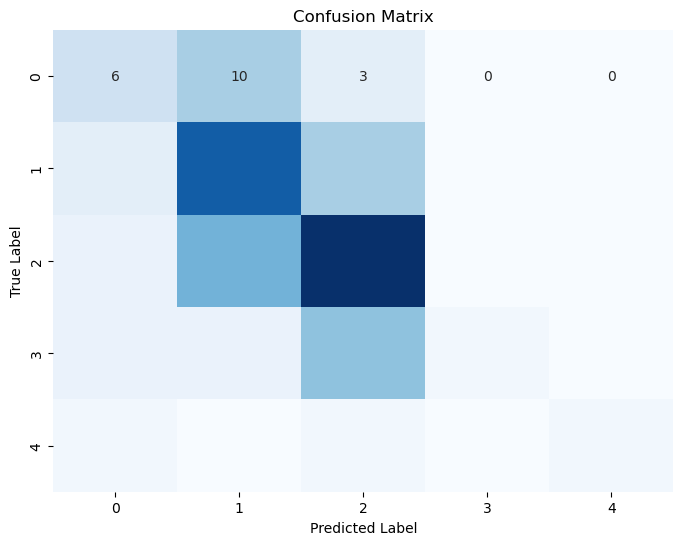

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#  Feature Importance (For Random Forest)
To understand which features are the most important in making predictions, you can plot the feature importance scores from the Random Forest model.

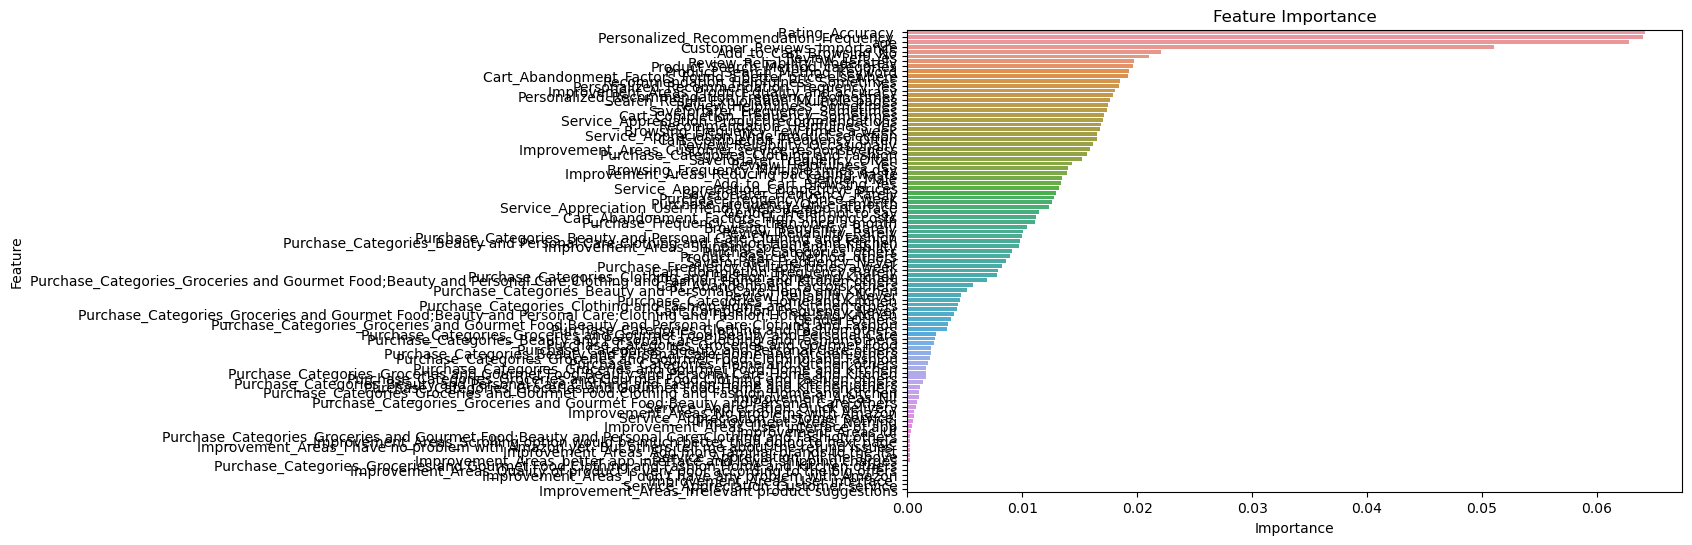

In [15]:
# Get feature importances from the Random Forest model
importances = model.feature_importances_

# Create a dataframe to hold the feature names and their importance values
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


# One-vs-Rest (OvR) ROC Curve for Multiclass Classification


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


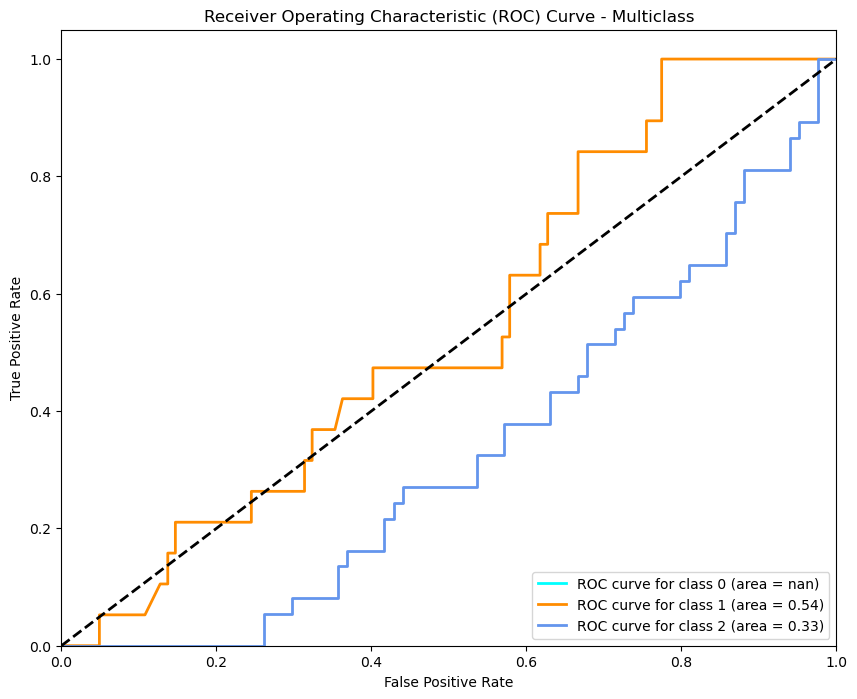

In [18]:
from sklearn.metrics import roc_curve, auc

# Calculate the probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Get the ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Macro-Averaging the ROC Curve for Multiclass Classification


In [22]:
# Check the shape of y_test_bin and y_score
print(f"Shape of y_test_bin: {y_test_bin.shape}")
print(f"Shape of y_score: {y_score.shape}")

# Check the first few rows of both arrays for any obvious issues
print("First 5 values of y_test_bin:\n", y_test_bin[:5])
print("First 5 values of y_score:\n", y_score[:5])


Shape of y_test_bin: (121, 3)
Shape of y_score: (121, 5)
First 5 values of y_test_bin:
 [[0 1 0]
 [0 0 1]
 [0 0 0]
 [0 0 1]
 [0 0 0]]
First 5 values of y_score:
 [[0.33333333 0.5        0.14705882 0.01960784 0.        ]
 [0.07216495 0.32989691 0.44329897 0.15463918 0.        ]
 [0.21153846 0.22115385 0.42307692 0.14423077 0.        ]
 [0.05       0.64       0.3        0.         0.01      ]
 [0.37142857 0.23809524 0.31428571 0.01904762 0.05714286]]


In [23]:
print("Code executed!")


Code executed!


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


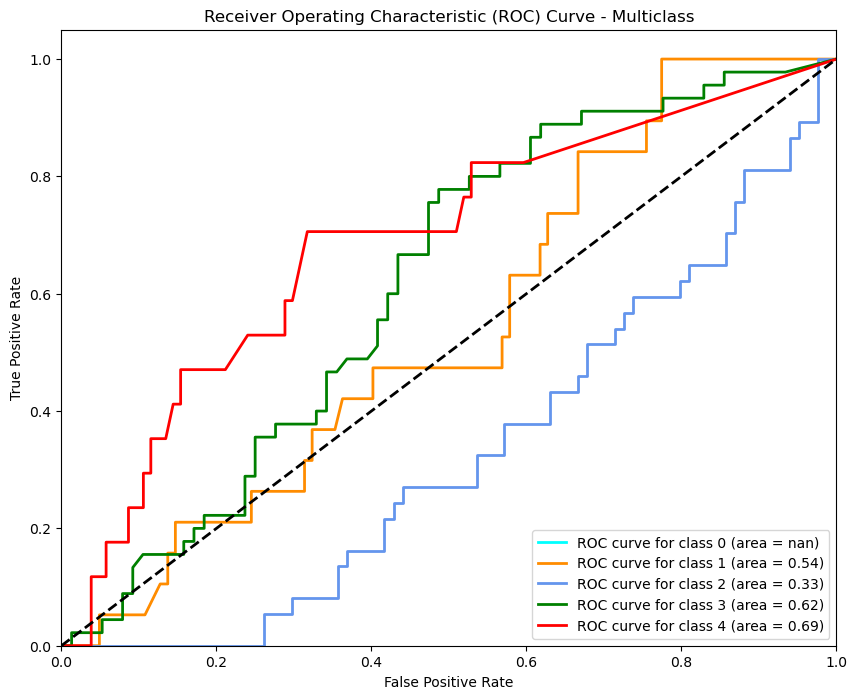

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize variables for storing False Positive Rate (FPR) and True Positive Rate (TPR)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]  # This is now 5

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc="lower right")
plt.show()
